In [14]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [15]:
def hadamard_matrix(n: int) -> sympy.Matrix:
    m = 2 ** n
    return sympy.Matrix([[(-1) ** bin(i & j).count('1') for j in range(m)] for i in range(m)]) / sympy.sqrt(2) ** n

In [18]:
hadamard_matrix(4)

Matrix([
[1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4],
[1/4, -1/4,  1/4, -1/4,  1/4, -1/4,  1/4, -1/4,  1/4, -1/4,  1/4, -1/4,  1/4, -1/4,  1/4, -1/4],
[1/4,  1/4, -1/4, -1/4,  1/4,  1/4, -1/4, -1/4,  1/4,  1/4, -1/4, -1/4,  1/4,  1/4, -1/4, -1/4],
[1/4, -1/4, -1/4,  1/4,  1/4, -1/4, -1/4,  1/4,  1/4, -1/4, -1/4,  1/4,  1/4, -1/4, -1/4,  1/4],
[1/4,  1/4,  1/4,  1/4, -1/4, -1/4, -1/4, -1/4,  1/4,  1/4,  1/4,  1/4, -1/4, -1/4, -1/4, -1/4],
[1/4, -1/4,  1/4, -1/4, -1/4,  1/4, -1/4,  1/4,  1/4, -1/4,  1/4, -1/4, -1/4,  1/4, -1/4,  1/4],
[1/4,  1/4, -1/4, -1/4, -1/4, -1/4,  1/4,  1/4,  1/4,  1/4, -1/4, -1/4, -1/4, -1/4,  1/4,  1/4],
[1/4, -1/4, -1/4,  1/4, -1/4,  1/4,  1/4, -1/4,  1/4, -1/4, -1/4,  1/4, -1/4,  1/4,  1/4, -1/4],
[1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4,  1/4, -1/4, -1/4, -1/4, -1/4, -1/4, -1/4, -1/4, -1/4],
[1/4, -1/4,  1/4, -1/4,  1/4, -1/4,  1/4, -1/4, -1/4,  1/4, -1/4,  1/4, -1/4,  1/4, -1/4,  1/4],
[1/4,  1/4, -1/4, -1/

In [3]:
def not_matrix(n: int, mask: int = None) -> sympy.Matrix:
    if mask is None:
        mask = (1 << n) - 1
    m = 2 ** n
    mat = sympy.Matrix.zeros(m)
    for i in range(m):
        mat[i, i ^ mask] = 1
    return mat

In [4]:
def cphase_matrix(n: int, phase) -> sympy.Matrix:
    m = 2 ** n
    mat = sympy.Matrix.eye(m)
    mat[m - 1, m - 1] = sympy.exp(1j * phase)
    mat.simplify()
    return mat

In [5]:
def flip_matrix(n: int, mask: int, phase) -> sympy.Matrix:
    not_ = not_matrix(n, ~mask)
    return not_ * cphase_matrix(n, phase) * not_

In [6]:
def grover_matrix(n: int) -> sympy.Matrix:
    had = hadamard_matrix(n)
    not_ = not_matrix(n)
    z = cphase_matrix(n, sympy.pi)
    return had * not_ * z * not_ * had

In [7]:
def init_state(n: int) -> sympy.Matrix:
    v = [0] * 2 ** n
    v[0] = 1
    return hadamard_matrix(n) * sympy.Matrix(v)

In [8]:
def as_prob(x):
    return (x * x.conjugate()).simplify()

In [9]:
num_qubits = 2
number_to_flip = 1
p = sympy.var('p')
reg = init_state(num_qubits)
flip = flip_matrix(num_qubits, number_to_flip, p)
grover = grover_matrix(num_qubits)
aa = grover * flip
aa.simplify()

In [11]:
grover

Matrix([
[ 7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8, -1/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8

In [10]:
aa

Matrix([
[ 7/8, -1/8, -1/8,  -exp(1.0*I*p)/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8,  7/8, -1/8,  -exp(1.0*I*p)/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8,  7/8,  -exp(1.0*I*p)/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8, 7*exp(1.0*I*p)/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8,  -exp(1.0*I*p)/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8,  -exp(1.0*I*p)/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8,  -exp(1.0*I*p)/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8,  -exp(1.0*I*p)/8, -1/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[-1/8, -1/8, -1/8,  -exp(1.0*I*p)/8, -1/8, -1/8, -1/8, -1/8,  7/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8, -1/8],
[

In [11]:
op = aa.subs(p, sympy.pi)
op.simplify()
b = reg
x = [0]
y = [as_prob(b[number_to_flip])]
for i in range(1, 10):
    b = op * b
    b.simplify()
    x.append(i)
    y.append(as_prob(b[number_to_flip]))
    print(y[-1])

121/256
3721/4096
63001/65536
609961/1048576
2105401/16777216
5470921/268435456
1567288921/4294967296
57455610601/68719476736
1090915491961/1099511627776


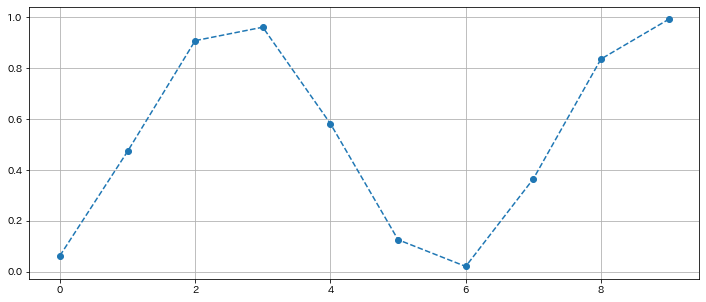

In [12]:
ax, fig = plt.subplots(1, 1,  figsize=(12, 5))
fig.plot(x, [y.evalf() for y in y], 'o--')
fig.grid()

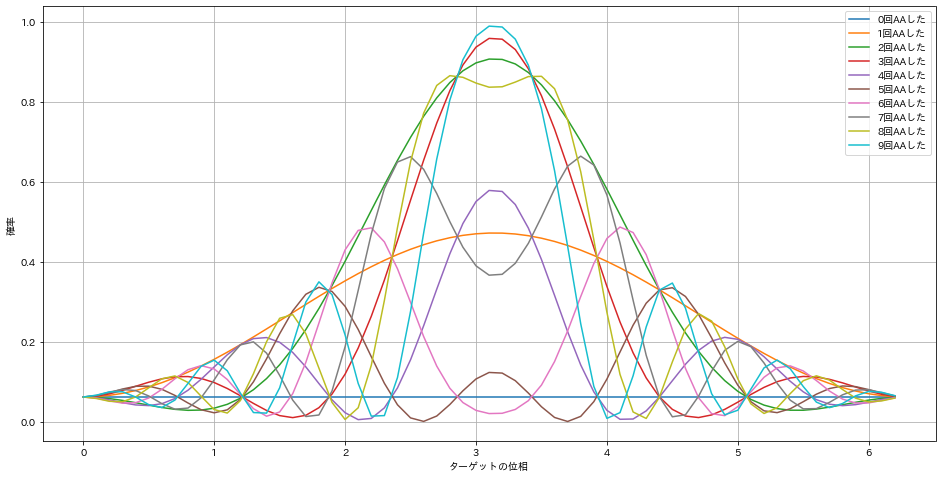

In [10]:
ax, fig = plt.subplots(1, 1,  figsize=(16, 8))
x = np.arange(0, np.pi * 2, 0.1)
r = reg
for i in range(10):
    y = np.array([r[number_to_flip].subs(p, x).as_real_imag() for x in x])
    fig.plot(x, y[:, 0]**2 + y[:, 1]**2, label=f'{i}回AAした')
    r = aa * r
fig.set_xlabel('ターゲットの位相')
fig.set_ylabel('確率')
fig.legend()
fig.grid()